# Testing various functions used in the final presetation 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
from matplotlib.colors import LightSource
#%matplotlib inline

from time_dilation import sch_rad, grav_dilation, lorentz_dilation, lorentz_grav_dilation 

In [2]:
# convenience function to convert solar masses to kg
def solarMass_to_kg(solar_mass):
    return solar_mass*2e30 

In [3]:
# make some test plots of the time dilation functions defined in time_dilation.py

# gravitational time dilation of a massive particle at rest as a function of radial distance r from EH 
far_time = 10 # observer time interval, in seconds 
hole_mass = solarMass_to_kg(2) # mass 
epsilon = 1e-6 # for numerical stability 

# compute the Schwarschild radius 
s_rad = sch_rad(hole_mass)

radius = np.arange(s_rad + epsilon, 10*s_rad) # radii, in meters 
plt.plot(radius - s_rad, grav_dilation(s_rad, radius, far_time))
plt.xlabel("Distance from SR, meters", size=17)
plt.ylabel("Particle Rest-frame time interval, seconds", size=14)

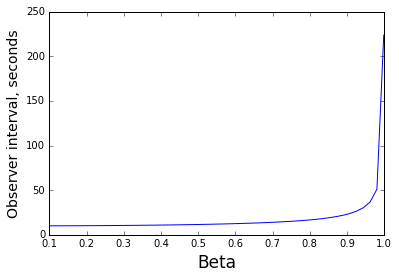

In [4]:
# Lorentz dilation due to a large velocity. We'll plot beta 
# versus the time interval 
rest_frame_interval = 10 # interval in particle's rest frame, in seconds 
beta = np.linspace(0.1, 0.999)
plt.plot(beta, lorentz_dilation(beta, rest_frame_interval))
plt.xlabel("Beta", size=17)
plt.ylabel("Observer interval, seconds", size=14)

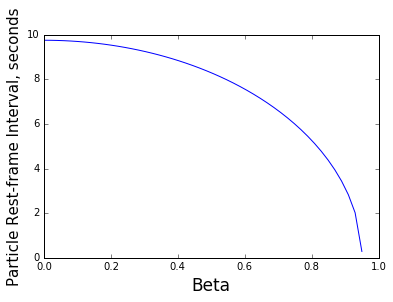

In [11]:
"""
Effects of lorentz and gravitational time dilation, for a massive particle travelling radially 
from a black hole, as a function of beta and radius 

First, we'll show two-dimensional plots for beta and the radius, then combine into a three-dimensional plot 
"""
# plot of interval vs. beta, for a given fixed radius  
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 

# Recompute Schw. radius (in case we want to use a different radius than above for the following cells)
s_rad = sch_rad(hole_mass)
beta = np.linspace(0 + epsilon, 0.99)
radius = 20*s_rad # here, the particle remains a distance x*s_rad away from the SR, where x is some number  

plt.plot(beta, lorentz_grav_dilation(beta, time_interval, s_rad, radius))
plt.xlabel("Beta", size=17)
plt.ylabel("Particle Rest-frame Interval, seconds", size=15)

'\nNote that this plot reduces to the first plot in this notebook for beta --> 0, as expected. \n'

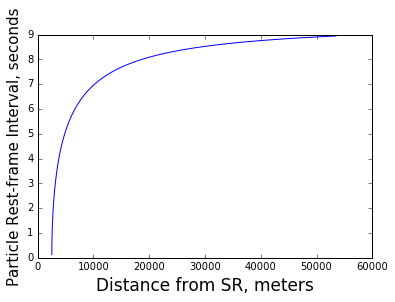

In [47]:
# plot of interval vs. radius, for a given fixed beta
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 
beta = 0.3 # velocity 

s_rad = sch_rad(hole_mass)
radius = np.arange(s_rad + epsilon, 10*s_rad) # radii, in meters  

plt.plot(radius - s_rad, lorentz_grav_dilation(beta, time_interval, s_rad, radius))
plt.xlabel("Distance from SR, meters", size=17)
plt.ylabel("Particle Rest-frame Interval, seconds", size=15)

"""
Note that this plot reduces to the first plot in this notebook for beta --> 0, as expected. 
"""

In [50]:
"""
TODO: make 3D plot of radius, beta vs. time interval. 
Then, consider varying the mass of the black hole to see the effects, and combining all plots onto one 
chart to easily compare effects and do a sanity check. 
After that, possibly add Doppler shift, and start thinking about black hole modeling. 
"""

'\nTODO: make 3D plot of radius, beta vs. time interval. \nThen, consider varying the mass of the black hole to see the effects, and combining all plots onto one \nchart to easily compare effects and do a sanity check. \nAfter that, possibly add Doppler shift, and start thinking about black hole modeling. \n'

<IPython.core.display.Javascript object>


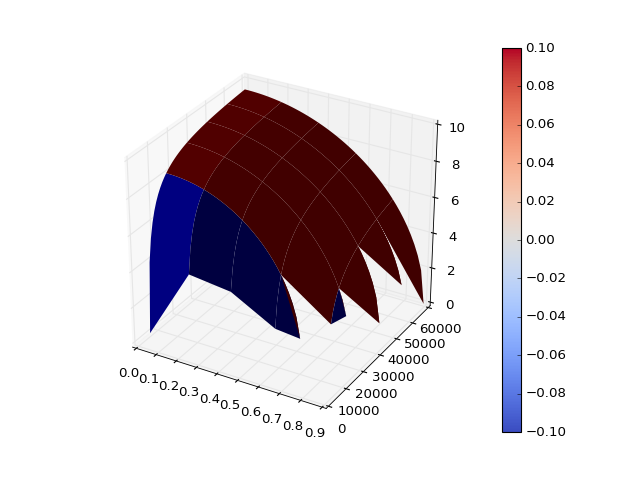

In [5]:
# 3D plot of lorentz_grav_dilation as a function of beta, radius 
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 

beta = np.linspace(0.0, 0.9)
s_rad = sch_rad(hole_mass)
radius = np.linspace(s_rad + epsilon, 10*s_rad)

%matplotlib notebook

# Todo: make a colormap that corresponds to the amount of dilation 
# red --> full dilation, blue --> no dilation 

fig = plt.figure()
ax = fig.gca(projection='3d') 
beta, radius = np.meshgrid(beta, radius)

dil = lorentz_grav_dilation(beta, time_interval, s_rad, radius)
grav_colors = cm.jet(dil)
#light = LightSource(90,0)
grav_surf = ax.plot_surface(beta, radius, dil, facecolors=grav_colors,
                       linewidth=0, antialiased=True)
# TODO: check Nan errors in lgd function (leads to weird cutout triangles in plot below?)
# also, try updating version of matplotlib to fix sharp boundary issue (or, possibly a python 2 issue?)
sm = cm.ScalarMappable(cmap=cm.coolwarm)
sm.set_array(dil)
fig.colorbar(sm)

fig.set_size_inches(8,6)
plt.show()

In [ ]:
sm = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
sm.set_array([])
plt.colorbar(sm) 